In [396]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
random_state = 42

### Loading the MNIST dataset 

In [397]:
raw = pd.read_csv("data.csv")
data = np.array(raw)

### Visualizing the Shape of the dataset 

In [398]:
raw.shape

(42000, 785)

### Visualizing the Head of the dataset 

In [399]:
raw.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### After understanding how the informations are placed the MNIST dataset is splitted

In [400]:
X_d = data[:,1:].T
Y_d = data[:,0]
print(X_d.shape)
print(Y_d.shape)

(784, 42000)
(42000,)


### Extracting an Subset composed only by 1,6 and 8

In [401]:
N1 = 1
N2 = 7
N3 = 2
indx = (Y_d[:] == N1) | (Y_d[:] == N2) | (Y_d[:] == N3)
Y = Y_d[indx]
X = X_d[:,indx]
print(X.shape)
print(Y.shape)


(784, 13262)
(13262,)


### Splitting the subset into Training set and Test set

In [402]:
def train_test_split(X, Y, N_train):
    d,N = X.shape
    idx = np.arange(0, N)
    np.random.seed(random_state)
    np.random.shuffle(idx)
    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    X_train = X[:,train_idx]
    Y_train = Y[train_idx]
    X_test = X[:,test_idx]
    Y_test = Y[test_idx]
    return X_train,Y_train,X_test,Y_test
    
X_train,Y_train,X_test,Y_test = train_test_split(X, Y, int(X.shape[1]*0.7))

In [403]:
print(X_train.shape)
print(X_test.shape)

(784, 9283)
(784, 3979)


### Computing the Centroid of the Training set

In [404]:
def centroid(X):
    return np.mean(X, axis=1, keepdims=True)
Cx_train = centroid(X_train)
print("Cx_train shape:",Cx_train.shape)
print("X_train shape:",X_train.shape)
print(np.linalg.norm(Cx_train,2))

Cx_train shape: (784, 1)
X_train shape: (784, 9283)
1393.3578159723402


### Centering the dataset

In [405]:
Xc_train = X_train - Cx_train
print(np.linalg.norm(centroid(Xc_train),2))

1.389705026881812e-12


### Computing the PCA of X_train with a fixed k = 2

In [406]:
def comp_Z(Xf, kf):
    Uf, sf, VTf = np.linalg.svd(Xf, full_matrices=False)
    U_kf = Uf[:,:kf]
    return U_kf.T @ Xf

In [407]:
Z_k_train = comp_Z(Xc_train, 2)
print("Z_k_test shape:",Z_k_train.shape)
print("Y_train shape:",Y_train.shape)

Z_k_test shape: (2, 9283)
Y_train shape: (9283,)


In [408]:
def idx(Y,N1,N2,N3):
    return Y[:] == N1,Y[:] == N2,Y[:] == N3

idx1_train,idx2_train,idx3_train = idx(Y_train,N1,N2,N3)
idx1_test,idx2_test,idx3_test = idx(Y_test,N1,N2,N3)

### Visualize the results and the position of the centroid of each cluster

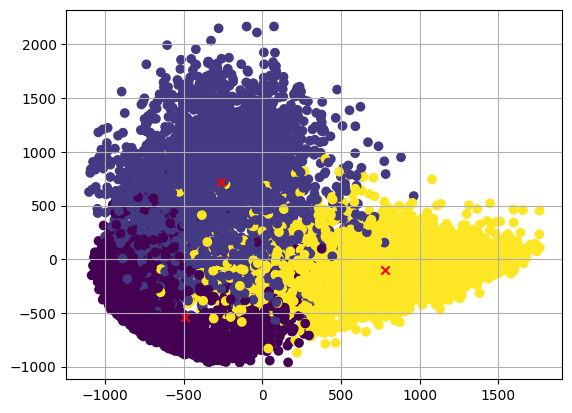

In [409]:
def scatter2D(Z,Y,idx1,idx2,idx3):
    Z_k1 = Z[:, idx1]
    Z_k2 = Z[:, idx2]
    Z_k3 = Z[:, idx3]
    C_k1 = np.mean(Z_k1,axis=1,keepdims=True)
    C_k2 = np.mean(Z_k2,axis=1,keepdims=True)
    C_k3 = np.mean(Z_k3,axis=1,keepdims=True)
    plt.scatter(Z[0,:], Z[1,:], c=Y[:])
    plt.scatter(C_k1[0,:], C_k1[1,:],c = "r", marker='x')
    plt.scatter(C_k2[0,:], C_k2[1,:],c = "r", marker='x')
    plt.scatter(C_k3[0,:], C_k3[1,:],c = "r", marker='x')
    plt.grid()
    plt.show()
scatter2D(Z_k_train,Y_train,idx1_train,idx2_train,idx3_train)

### The  distances from the Centroid of the Training set

In [410]:
def compAverDist(center,X):
    return np.mean(np.linalg.norm((X - center),2, axis=0))

Z_k1 = Z_k_train[:, idx1_train]
Z_k2 = Z_k_train[:, idx2_train]
Z_k3 = Z_k_train[:, idx3_train]
Xk1 = np.mean(Z_k1,axis=1,keepdims=True)
Xk2 = np.mean(Z_k2,axis=1,keepdims=True)
Xk3 = np.mean(Z_k3,axis=1,keepdims=True)

distCluster1 = compAverDist(Xk1,Z_k1)
print(distCluster1)
distCluster2 = compAverDist(Xk2,Z_k2)
print(distCluster2)
distCluster3 = compAverDist(Xk3,Z_k3)
print(distCluster3)


400.7133173807462
435.0900833124239
538.758464579237


### The  distances from the Centroid of the Test set

In [411]:
Cx_test = centroid(X_test)
Xc_test = X_test - Cx_test
Z_k_test = -comp_Z(Xc_test, 2)
Z_k1 = Z_k_test[:, idx1_test]
Z_k2 = Z_k_test[:, idx2_test]
Z_k3 = Z_k_test[:, idx3_test]
Xk1 = np.mean(Z_k1,axis=1,keepdims=True)
Xk2 = np.mean(Z_k2,axis=1,keepdims=True)
Xk3 = np.mean(Z_k3,axis=1,keepdims=True)
distCluster1 = compAverDist(Xk1,Z_k1)
print(distCluster1)
distCluster2 = compAverDist(Xk2,Z_k2)
print(distCluster2)
distCluster3 = compAverDist(Xk3,Z_k3)
print(distCluster3)


393.1289908147065
442.80167965281265
538.0840818993684


In [412]:
def classificationAlgo(c1,c2,c3,n1,n2,n3,x,y):
    counter=0
    labels = []
    a = 0
    for i in range(x.shape[1]):
        dist1=np.linalg.norm(x[:,i:i+1]-c1,2)
        dist2=np.linalg.norm(x[:,i:i+1]-c2,2)
        dist3=np.linalg.norm(x[:,i:i+1]-c3,2)
        minDist=min(dist1,dist2,dist3)
        if minDist==dist1:
            a = n1
        if minDist==dist2:
            a = n2
        if minDist==dist3:
            a = n3
        labels.append(a)
        if a==y[i]:
            counter+=1
    return counter,labels

Xc1 = Z_k_train[:, idx1_train]
Xc2 = Z_k_train[:, idx2_train]
Xc3 = Z_k_train[:, idx3_train]
C1 = centroid(Xc1)
C2 = centroid(Xc2)
C3 = centroid(Xc3)
counter_test,labels = classificationAlgo(C1,C2,C3,N1,N2,N3,Z_k_test,Y_test)

print("Test Accuracy",counter_test*100/len(Y_test))

Test Accuracy 90.22367429002261


### Scatter plot after clustering

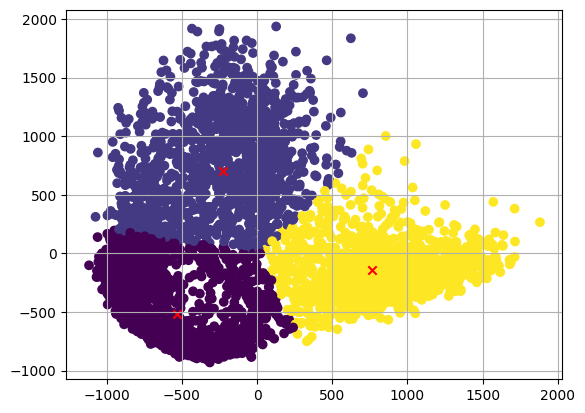

In [413]:
scatter2D(Z_k_test,labels,idx1_test,idx2_test,idx3_test)

### 3D scatter plot 

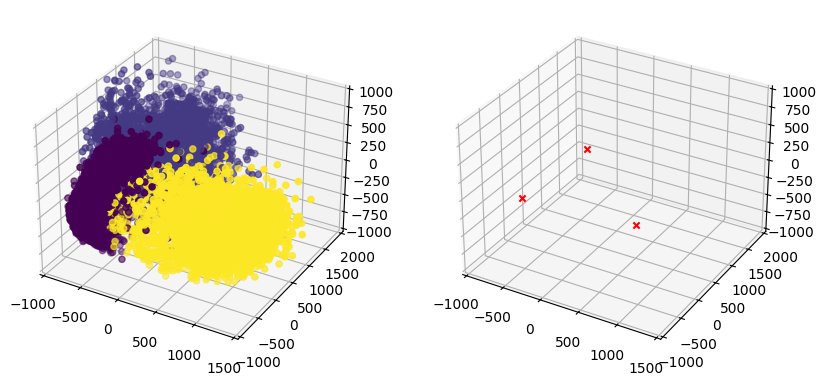

In [414]:
def scatter3D(X,Y,idx1,idx2,idx3):
    Z_k = comp_Z(X, 3)
    Z_k1 = Z_k[:, idx1]
    Z_k2 = Z_k[:, idx2]
    Z_k3 = Z_k[:, idx3]
    C_k1 = np.mean(Z_k1,axis=1,keepdims=True)
    C_k2 = np.mean(Z_k2,axis=1,keepdims=True)
    C_k3 = np.mean(Z_k3,axis=1,keepdims=True)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(Z_k[0,:], Z_k[1,:],Z_k[2, :],c=Y)
    #fig2 = plt.figure()
    bx = fig.add_subplot(122, projection='3d')
    bx.scatter(C_k1[0,:], C_k1[1,:],C_k1[2,:],c = "r", marker='x')
    bx.scatter(C_k2[0,:], C_k2[1,:],C_k2[2,:],c = "r", marker='x')
    bx.scatter(C_k3[0,:], C_k3[1,:],C_k3[2,:],c = "r", marker='x')
    ax.set_xlim([-1000, 1500])
    ax.set_ylim([-1000, 2000])
    ax.set_zlim([-1000, 1000])
    bx.set_xlim([-1000, 1500])
    bx.set_ylim([-1000, 2000])
    bx.set_zlim([-1000, 1000])
    plt.grid()
    plt.show()
scatter3D(Xc_train,Y_train,idx1_train,idx2_train,idx3_train)

### Accuracy with K=3

In [415]:
Z_k_train = comp_Z(Xc_train, 3)
Z_k1 = Z_k_train[:, idx1_train]
Z_k2 = Z_k_train[:, idx2_train]
Z_k3 = Z_k_train[:, idx3_train]
C1 = centroid(Z_k1)
C2 = centroid(Z_k2)
C3 = centroid(Z_k3)

Z_k_test = -comp_Z(Xc_test, 3)
counter_test = classificationAlgo(C1,C2,C3,N1,N2,N3,Z_k_test,Y_test)[0]

print("Test Accuracy",counter_test*100/len(Y_test))


Test Accuracy 91.75672279467203


### Accuracy with K=5

In [416]:
Z_k_train = comp_Z(Xc_train, 5)
Z_k1 = Z_k_train[:, idx1_train]
Z_k2 = Z_k_train[:, idx2_train]
Z_k3 = Z_k_train[:, idx3_train]
C1 = centroid(Z_k1)
C2 = centroid(Z_k2)
C3 = centroid(Z_k3)

Z_k_test = -comp_Z(Xc_test, 5)
counter_test = classificationAlgo(C1,C2,C3,N1,N2,N3,Z_k_test,Y_test)[0]

print("Test Accuracy",counter_test*100/len(Y_test))

Test Accuracy 91.75672279467203


### Accuracy with k=10

In [417]:
Z_k_train = comp_Z(Xc_train, 10)
Z_k1 = Z_k_train[:, idx1_train]
Z_k2 = Z_k_train[:, idx2_train]
Z_k3 = Z_k_train[:, idx3_train]
C1 = centroid(Z_k1)
C2 = centroid(Z_k2)
C3 = centroid(Z_k3)

Z_k_test = -comp_Z(Xc_test, 10)
counter_test = classificationAlgo(C1,C2,C3,N1,N2,N3,Z_k_test,Y_test)[0]

print("Test Accuracy",counter_test*100/len(Y_test))

Test Accuracy 91.53053531037949


### Accuracy with k=15

In [418]:
Z_k_train = comp_Z(Xc_train, 15)
Z_k1 = Z_k_train[:, idx1_train]
Z_k2 = Z_k_train[:, idx2_train]
Z_k3 = Z_k_train[:, idx3_train]
C1 = centroid(Z_k1)
C2 = centroid(Z_k2)
C3 = centroid(Z_k3)

Z_k_test = -comp_Z(Xc_test, 15)
counter_test = classificationAlgo(C1,C2,C3,N1,N2,N3,Z_k_test,Y_test)[0]

print("Test Accuracy",counter_test*100/len(Y_test))

Test Accuracy 91.4300075395828


### Accuracy with k=30

In [419]:
Z_k_train = comp_Z(Xc_train, 70)
Z_k1 = Z_k_train[:, idx1_train]
Z_k2 = Z_k_train[:, idx2_train]
Z_k3 = Z_k_train[:, idx3_train]
C1 = centroid(Z_k1)
C2 = centroid(Z_k2)
C3 = centroid(Z_k3)

Z_k_test = -comp_Z(Xc_test, 70)
counter_test = classificationAlgo(C1,C2,C3,N1,N2,N3,Z_k_test,Y_test)[0]

print("Test Accuracy",counter_test*100/len(Y_test))

Test Accuracy 1.633576275446092


### Test with different choices of N1-N2-N3

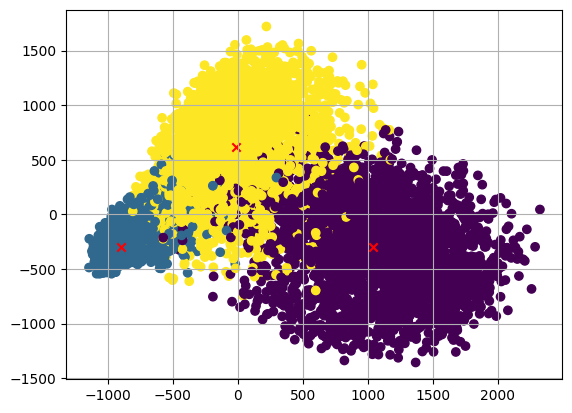

In [420]:
N4 = 0
N5 = 3
N6 = 1
indx = (Y_d[:] == N4) | (Y_d[:] == N5) | (Y_d[:] == N6)
Y = Y_d[indx]
X = X_d[:,indx]
X_train,Y_train,X_test,Y_test = train_test_split(X, Y, int(X.shape[1]*0.7))
Cx_train = centroid(X_train)
Xc_train = X_train - Cx_train
idx1_train,idx2_train,idx3_train = idx(Y_train,N4,N5,N6)
idx1_test,idx2_test,idx3_test = idx(Y_test,N4,N5,N6)

Z_k_train = comp_Z(Xc_train, 2)
scatter2D(Z_k_train,Y_train,idx1_train,idx2_train,idx3_train)

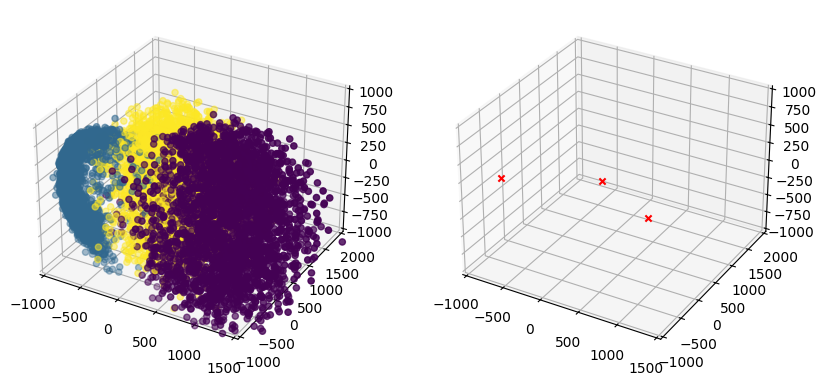

In [421]:
scatter3D(Xc_train,Y_train,idx1_train,idx2_train,idx3_train)

### Accuracy with k=2

In [422]:
Z_k4 = Z_k_train[:, idx1_train]
Z_k5 = Z_k_train[:, idx2_train]
Z_k6 = Z_k_train[:, idx3_train]

C4=centroid(Z_k4)
C5=centroid(Z_k5)
C6=centroid(Z_k6)

Cx_test = centroid(X_test)
Xc_test = X_test - Cx_test
Z_k_test = -comp_Z(Xc_test, 2)
counter_test = classificationAlgo(C4,C5,C6,N4,N5,N6,Z_k_test,Y_test)[0]

print("Test Accuracy",counter_test*100/len(Y_test))

Test Accuracy 93.64717792963806


### Accuracy with k=3

In [424]:
Z_k_train = comp_Z(Xc_train, 3)
Z_k4 = Z_k_train[:, idx1_train]
Z_k5 = Z_k_train[:, idx2_train]
Z_k6 = Z_k_train[:, idx3_train]

C4=centroid(Z_k4)
C5=centroid(Z_k5)
C6=centroid(Z_k6)

Z_k_test = -comp_Z(Xc_test, 3)
counter_test = classificationAlgo(C4,C5,C6,N4,N5,N6,Z_k_test,Y_test)[0]

print("Test Accuracy",counter_test*100/len(Y_test))

Test Accuracy 94.00151860288534
